In [33]:
# Library importation
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import TargetEncoder
from feature_engine.encoding import MeanEncoder
from category_encoders import TargetEncoder as CE_TargetEncoder
import seaborn as sns

In [34]:
# Carga de datos
# Dataframe definitino
df = pd.read_csv('productos_vendidos.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

# Filter data by Brand and Manufacturer
cond1 = df['BRAND'] == 'VANISH' 
cond2 = df['MANUFACTURER'] == 'RECKITT'

# New dataframe definition
df = df[cond1 & cond2]
df = df.drop(['BRAND','MANUFACTURER'], axis=1)
df.head()

# Grouping by Item_code
df_agrupado = df.groupby(['ITEM_CODE']).agg({'TOTAL_VALUE_SALES': 'sum',
                                                      'TOTAL_UNIT_SALES': 'sum',
                                                      'TOTAL_UNIT_AVG_WEEKLY_SALES':'sum',
                                                      'FORMAT': 'first', 'ATTR1': 'first', 'ATTR3': 'first',
                                           }).reset_index()
df_agrupado = df_agrupado.set_index('ITEM_CODE')

In [35]:
# Categorical variable transformation using TargetEncoder

# X and Y definition
X = df_agrupado.drop('TOTAL_VALUE_SALES', axis=1)  # Attributes
y = df_agrupado['TOTAL_VALUE_SALES']  # Key value

# Definitino of categorical cols into a list
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Definition of train and test database
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Object encoder creation
encoder = CE_TargetEncoder(smoothing=10)

# Utilization of object encoder to train data
encoder.fit(X_train, y_train)

# Train and Test data transformation
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Transformation of whole dataframe
X_encoded = encoder.transform(X)

#  Grouping of new variables with original variables
df_encoded = pd.concat([X_encoded, df_agrupado.drop(columns=categorical_cols + ['TOTAL_VALUE_SALES'])], axis=1)

# Merging with key variable TOTAL_VALUE_SALES
df_final = pd.concat([df_agrupado['TOTAL_VALUE_SALES'], df_encoded], axis=1)
df_final = df_final.iloc[:,:6]
df_final

# Final array 
X = df_final.values
X

array([[2.88850000e+01, 5.86000000e-01, 3.41199000e+02, 2.13509410e+04,
        2.85933183e+04, 2.98971283e+04],
       [3.58000000e+00, 1.62000000e-01, 1.28167000e+02, 2.13509410e+04,
        2.85933183e+04, 2.98971283e+04],
       [9.94839470e+04, 8.05998800e+03, 1.18396270e+04, 3.10185509e+04,
        2.85933183e+04, 2.98971283e+04],
       [3.10600000e+00, 1.18000000e-01, 8.72080000e+01, 2.13509410e+04,
        2.85933183e+04, 2.74425758e+04],
       [1.78400000e+00, 9.20000000e-02, 9.20000000e+01, 3.11276113e+04,
        2.85933183e+04, 2.98971283e+04],
       [1.20600000e+00, 6.00000000e-02, 5.20000000e+01, 3.11276113e+04,
        2.85933183e+04, 2.74425758e+04],
       [1.99260000e+01, 3.86000000e-01, 1.83294000e+02, 2.13509410e+04,
        2.85933183e+04, 2.74425758e+04],
       [4.22480000e+01, 2.07600000e+00, 7.71994000e+02, 3.11276113e+04,
        2.85933183e+04, 2.98971283e+04],
       [5.97595000e+03, 4.49865000e+02, 1.75081900e+03, 3.22034890e+04,
        2.85933183e+04, 

In [36]:
# Data standarization with StandardScaler() method
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.68640486, -0.45268047, -0.55751472, -1.18235406, -0.16329932,
         0.77728159],
       [-0.68702232, -0.45294778, -0.61922877, -1.18235406, -0.16329932,
         0.77728159],
       [ 1.74035278,  4.62839707,  2.77350829,  0.75984267, -0.16329932,
         0.77728159],
       [-0.68703388, -0.45297552, -0.63109433, -1.18235406, -0.16329932,
        -1.28653504],
       [-0.68706614, -0.45299192, -0.62970612,  0.7817526 , -0.16329932,
         0.77728159],
       [-0.68708024, -0.45301209, -0.64129387,  0.7817526 , -0.16329932,
        -1.28653504],
       [-0.68662346, -0.45280656, -0.60325882, -1.18235406, -0.16329932,
        -1.28653504],
       [-0.68607879, -0.4517411 , -0.43271609,  0.7817526 , -0.16329932,
         0.77728159],
       [-0.54129324, -0.16943099, -0.14915658,  0.99789354, -0.16329932,
         0.77728159],
       [ 0.62130051, -0.3112931 , -0.29046341, -1.18235406, -0.16329932,
         0.77728159],
       [ 0.62510441, -0.30809985, -0.28235894, -1.

In [37]:
# Reduction by PCA using 3 components
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Dataframe creation with principal componentes
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Total variance explained by each component
total_explained_variance = sum(explained_variance)

print(f"Variance explained by 1st component: {explained_variance[0]:.4f}")
print(f"Variance explained by 2nd component: {explained_variance[1]:.4f}")
print(f"Variance explained by 3rd component: {explained_variance[2]:.4f}")
print(f"Total Variance explained by all components: {total_explained_variance:.4f}")

Variance explained by 1st component: 0.4162
Variance explained by 2nd component: 0.2056
Variance explained by 3rd component: 0.1458
Total Variance explained by all components: 0.7677


Score Silhouette: k =  2 : 0.39285916951738575
Score Silhouette: k =  3 : 0.3343701145854283
Score Silhouette: k =  4 : 0.3599693196216963
Score Silhouette: k =  5 : 0.4111832792303568
Score Silhouette: k =  6 : 0.44095198330621793


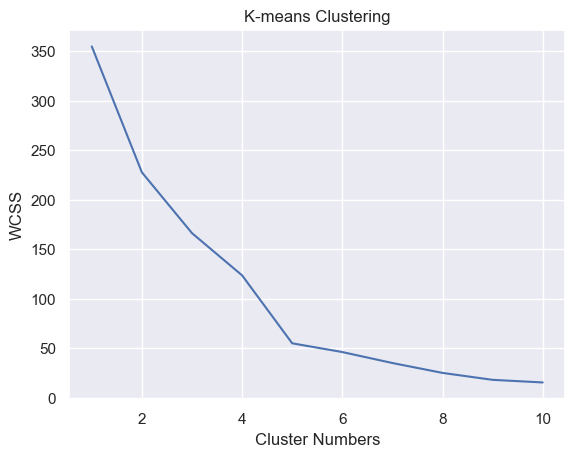

In [38]:
# Optimal cluster number determination

# library importacion
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Optimal cluster number determination by silhouette method
wcss_ctf = []

# KMeans algorithm implementation
for index in range (1,11):
    kmeans = KMeans(n_clusters = index, init = 'k-means++', random_state= 1) 
    kmeans.fit(X_pca) #la instruccion kmeans.fit(fields) tomara la lista de valores 'dataset' y especificara a que grupo pertenece cada obvservacion
    wcss_ctf.append(kmeans.inertia_)#se agregara en cada ciclo la distancia al cuadrado de cada punto hacia el cluster

# Silhouette visualization
sns.set()
plt.plot(range(1,11), wcss_ctf)
plt.title('K-means Clustering')
plt.xlabel('Cluster Numbers')
plt.ylabel('WCSS')  # Weighted cluster sum of squares


# Score calculation for each k value
for j in range (2,7):
    kmeans = KMeans(n_clusters = j, random_state = 1)
    kmeans.fit_predict(X_pca)
    
    # Silhouette Score
    score = silhouette_score(X_scaled, kmeans.labels_, metric = 'euclidean')
    print ('Score Silhouette:', 'k = ', j, ':', score)
plt.savefig('graph1_codo.png', dpi=400)

In [39]:
# K - means algorithm using k = 5
n_clusters = 5 
kmeans = KMeans(n_clusters=n_clusters, random_state=42) # n_init para evitar advertencias
kmeans.fit(X_pca)

# Obtain cluster labels asigend to each observation
labels = kmeans.labels_

# Add labels to PCA dataframe
pca_df['Cluster'] = labels
pca_df

,PC1,PC2,PC3,Cluster
0,-1.211986,-0.203721,-0.827501,1
1,-1.248125,-0.202613,-0.826048,1
2,5.377342,0.423768,-0.970117,2
3,-1.150217,-1.412945,0.775272,4
4,-0.878406,0.823035,-0.541323,1
...,...,...,...,...
72,1.163684,-0.324572,-0.968979,0
73,-0.117260,-0.276995,-0.876289,1
74,0.193035,-1.500553,0.716027,4
75,-0.799792,0.809054,-0.547871,1


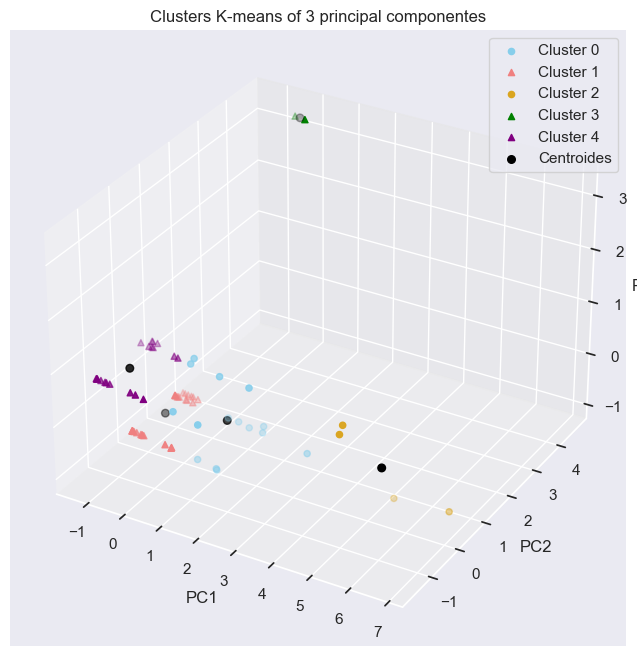

In [40]:
# Visualization

# Create 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster 
colors = ['skyblue', 'lightcoral', 'goldenrod', 'green', 'purple']  

# Cluster 0 plotting
cluster_0_data = pca_df[pca_df['Cluster'] == 0]
ax.scatter(cluster_0_data['PC1'], cluster_0_data['PC2'], cluster_0_data['PC3'], # coordenadas X, Y, y Z respectivamente
           c=colors[0], marker='o', label='Cluster 0')

# Cluster 1 plotting
cluster_1_data = pca_df[pca_df['Cluster'] == 1]
ax.scatter(cluster_1_data['PC1'], cluster_1_data['PC2'], cluster_1_data['PC3'],
           c=colors[1], marker='^', label='Cluster 1')


# Cluster 2 plotting
cluster_2_data = pca_df[pca_df['Cluster'] == 2]
ax.scatter(cluster_2_data['PC1'], cluster_2_data['PC2'], cluster_2_data['PC3'],
           c=colors[2], marker='o', label='Cluster 2')


# Cluster 3 plotting
cluster_3_data = pca_df[pca_df['Cluster'] == 3]
ax.scatter(cluster_3_data['PC1'], cluster_3_data['PC2'], cluster_3_data['PC3'],
           c=colors[3], marker='^', label='Cluster 3')


# Cluster 4 plotting
cluster_4_data = pca_df[pca_df['Cluster'] == 4]
ax.scatter(cluster_4_data['PC1'], cluster_4_data['PC2'], cluster_4_data['PC3'],
           c=colors[4], marker='^', label='Cluster 4')


# Coordinates of each centroid
centroids = kmeans.cluster_centers_

# Centroids plotting
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           marker='o', s=30, c='black', label='Centroides')

# Etiquetas de los ejes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters K-means of 3 principal componentes')
ax.legend()

plt.savefig('graph2_kmeans.png', dpi=400)

In [41]:
# Mean and standard deviation of each cluster
list = []
for cluster in range(0,5):
    num_cluster = df[df['Cluster'] == cluster]
    media = num_cluster['TOTAL_VALUE_SALES'].mean()
    std = num_cluster['TOTAL_VALUE_SALES'].std()
    print (f'μ cluster {cluster}= {round(media,2)}')
    print (f'σ cluster {cluster}= {round(std,2)}\n')
    list.append(round(media,2))

sorted(list)

KeyError: 'Cluster'

In [ ]:
# Adition of cluster number to each observation on original dataframe
df = df_agrupado.copy()

# Cluster label obtention
labels = kmeans.labels_

df['Cluster'] = labels
df

In [ ]:
# Boxplot visualization of observations by cluster
df = df.rename(columns={'CLUSTER_NUMBER': 'Cluster'})
fig, axs = plt.subplots(figsize=(8,5))
sns.boxplot(data=df, x='TOTAL_VALUE_SALES', hue='Cluster', orient='h', palette={0:'skyblue', 1:'lightcoral', 2:'lightyellow', 3:'olive', 4:'pink'})
plt.title('Total Value arnings according to K-means segmentation')
plt.xlabel('Total Value Earnings')
plt.savefig('graph3_kmeans.png', dpi=400)

In [ ]:
# Calculo de la mediana

cluster1= df[df.Cluster == 1]
cluster1_m = cluster1['TOTAL_VALUE_SALES'].median()

cluster4 = df[df.Cluster == 4]
cluster4_m = cluster4['TOTAL_VALUE_SALES'].median()

cluster3 = df[df.Cluster == 3]
cluster3_m = cluster3['TOTAL_VALUE_SALES'].median()

cluster0 = df[df.Cluster == 0]
cluster0_m = cluster0['TOTAL_VALUE_SALES'].median()

cluster2 = df[df.Cluster == 2]
cluster2_m = cluster2['TOTAL_VALUE_SALES'].median()




print('Mediana cluster 1 =', cluster1_m)
print('Mediana cluster 4 =', cluster4_m)
print('Mediana cluster 3 =', cluster3_m)
print('Mediana cluster 0 =', cluster0_m)
print('Mediana cluster 2 =', cluster2_m)

In [ ]:
# Conteo de observaciones
lista=[1,4,3,0,2]
for cluster in lista:
    num_cluster = df[df['Cluster'] == cluster]
    obs = num_cluster.shape[0]
    print(f'# Observaciones en Cluster {cluster} = {obs}')
    

In [ ]:
cluster2.index

In [ ]:
cluster1_lista = ['7501058712813', '7501058713780', '7501058715029', '7501058715364',
       '7501058715531', '7501058715883', '7501058716064', '7501058716088',
       '7501058716422', '7501058716439', '7501058716453', '7501058716477',
       '7501058717009', '7501058752772', '7501058753205', '7501058782694BP1',
       '7501058784346', '7501058784889', '7501058786548BP1', '7501058788931',
       '7501058789778BP1', '7501058790415BP1', '7501058792778BP1',
       '7501058792808BP2', '7501058793898', '7501058794949BP1',
       '7501058794956BP2', '7501058794963BP1', '7501058794970BP2',
       '7501058796578BP1', '7501058796585', '7501058796837',
       '7501058796950BP1', '7702626213774', '7891035040191']
cluster2_lista = ['7501058714596', '7501058717023', '7501058717030', '7891035040276']
